In [2]:
pip install yahoofinancials 

  Created wheel for yahoofinancials: filename=yahoofinancials-1.6-py3-none-any.whl size=15190 sha256=e4bcafcaccc825a9edf27da17dd7b6e15993cd0a06414b8d2eb2f73e593f4932
  Stored in directory: /Users/JakeDoherty_1/Library/Caches/pip/wheels/4b/63/46/e7110bfee88685fe69e338d1b14d1748921862aa57b6705b60
Successfully built yahoofinancials
Note: you may need to restart the kernel to use updated packages.


In [19]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline
import datetime 
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import hvplot.pandas
import seaborn as sns
from yahoofinancials import YahooFinancials

In [20]:
#Five year data 
start_sp = datetime.datetime(2014, 10, 1)
end_sp = datetime.datetime(2019, 10, 1)

#create dataframes
#SPDR S&P 500 ETF
SPX_df_five = pdr.get_data_yahoo('SPY', start_sp, end_sp)
SPX_df = pdr.get_data_yahoo('SPY', start_sp, end_sp)

#VGT ETF

VGT_df_five = pdr.get_data_yahoo('VGT', start_sp, end_sp)
VGT_df = pdr.get_data_yahoo('VGT', start_sp, end_sp)

In [21]:
#Drop extra columns to be left with closing price 
SPX_df_five.drop(columns=['High', 'Low', 'Open', 'Volume', 'Adj Close'], inplace=True)
SPX_df_five.head()
VGT_df_five.drop(columns=['High', 'Low', 'Open', 'Volume', 'Adj Close'], inplace=True)
VGT_df_five.head()

,Close
Date,
2014-10-01,98.430000
2014-10-02,98.470001
2014-10-03,99.349998
2014-10-06,99.209999
2014-10-07,97.529999


In [22]:
#Drop extra columns to be left with closing price 
SPX_df.drop(columns=['High', 'Low', 'Open', 'Volume', 'Adj Close'], inplace=True)
SPX_df.head()
VGT_df.drop(columns=['High', 'Low', 'Open', 'Volume', 'Adj Close'], inplace=True)
VGT_df.head()

,Close
Date,
2014-10-01,98.430000
2014-10-02,98.470001
2014-10-03,99.349998
2014-10-06,99.209999
2014-10-07,97.529999


In [23]:
SPX_df = SPX_df.rename(columns = {"Close": "SPX Closing Prices"})
VGT_df = VGT_df.rename(columns = {"Close": "VGT Closing Prices"}) 

In [24]:
combined_df_close = pd.concat([VGT_df, SPX_df],axis='columns', join="inner")
combined_df_close.head()

,VGT Closing Prices,SPX Closing Prices
Date,,
2014-10-01,98.430000,194.350006
2014-10-02,98.470001,194.380005
2014-10-03,99.349998,196.520004
2014-10-06,99.209999,196.289993
2014-10-07,97.529999,193.259995


In [25]:
combined_df_close['SPX Closing Prices'].hvplot() + combined_df_close['VGT Closing Prices'].hvplot()

:Layout
   .Curve.SPX_Closing_Prices :Curve   [Date]   (SPX Closing Prices)
   .Curve.VGT_Closing_Prices :Curve   [Date]   (VGT Closing Prices)

In [28]:
daily_returns = combined_df_close.pct_change()
daily_returns = daily_returns.rename(columns = {"VGT Closing Prices": "VGT Daily Returns"})
daily_returns = daily_returns.rename(columns= {"SPX Closing Prices":"SPX Daily Returns"})

In [29]:
daily_returns.head()

,VGT Daily Returns,SPX Daily Returns
Date,,
2014-10-01,NaN,NaN
2014-10-02,0.000406,0.000154
2014-10-03,0.008937,0.011009
2014-10-06,-0.001409,-0.001170
2014-10-07,-0.016934,-0.015436


In [31]:
correlation =  daily_returns.corr()
correlation

,VGT Daily Returns,SPX Daily Returns
VGT Daily Returns,1.000000,0.914998
SPX Daily Returns,0.914998,1.000000


In [32]:
# Calculates the covariance of all daily returns of VGT vs. SPY
covariance = daily_returns['VGT Daily Returns'].cov(daily_returns['SPX Daily Returns'])
covariance

8.900638515515627e-05

In [33]:
# Calculates variance of all S&P 500 daily returns
variance = daily_returns['SPX Daily Returns'].var()
variance

7.455223834692598e-05

In [34]:
# Calculate beta of all daily returns of BTC
vgt_beta = covariance / variance
vgt_beta_round = round(vgt_beta, 2)
vgt_beta_round

1.19

In [35]:
# Calculates the 30-day rolling covariance of Bitcoin vs. S&P 500 and plot the data
rolling_covariance_vgt = daily_returns['VGT Daily Returns'].rolling(window=30).cov(daily_returns['SPX Daily Returns'])
rolling_covariance_vgt.hvplot(figsize=(20, 10), title='Rolling 30-Day Covariance of VGT Returns vs. SPY Returns')

:Curve   [Date]   (0)

In [37]:
# Calculate 30-day rolling covariance of Bitcoin vs. S&P 500 and plot the data
rolling_variance = daily_returns['SPX Daily Returns'].rolling(window=30).var()

# Calculate 30-day rolling beta of Bitcoin and plot the data
rolling_vgt_beta = rolling_covariance_vgt / rolling_variance

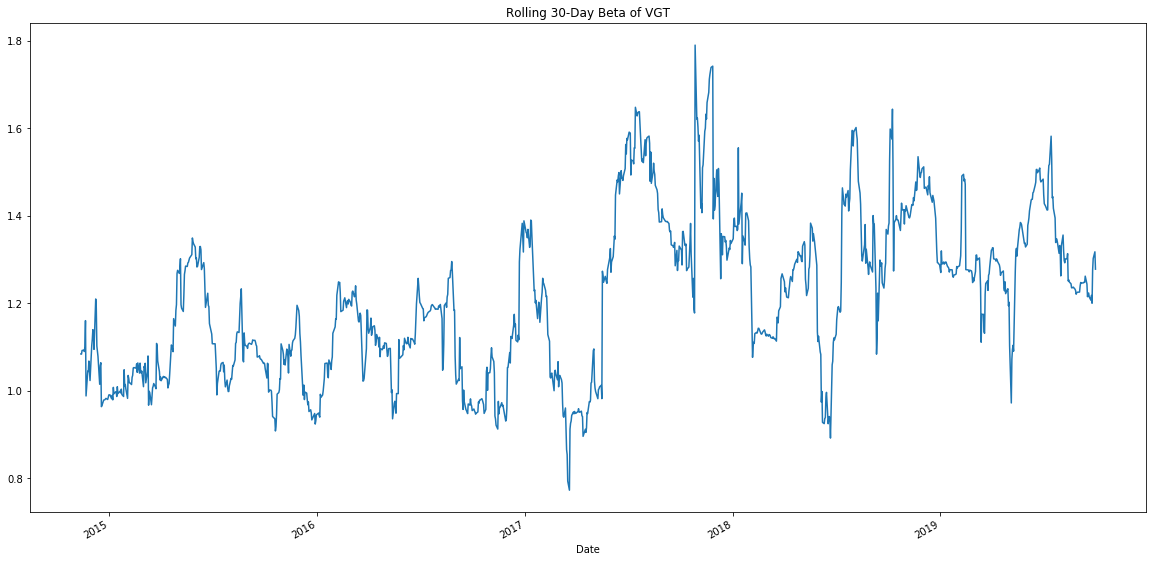

In [38]:
mc = rolling_vgt_beta.plot(figsize=(20, 10), title='Rolling 30-Day Beta of VGT')
mc.figure.savefig('rolling_vgt_beta.png')

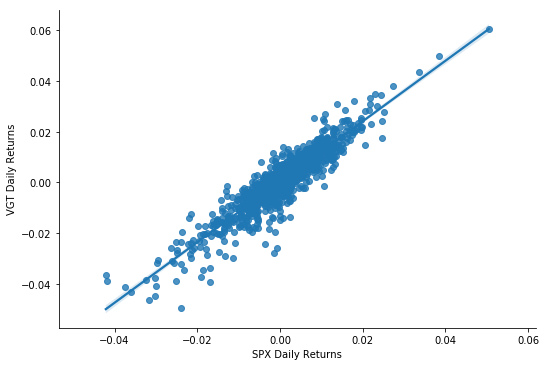

In [39]:
sns.lmplot(x='SPX Daily Returns', y='VGT Daily Returns', data=daily_returns, aspect=1.5, fit_reg=True)


In [40]:
#US Dollar/USDX - Index
USD_df_five = pdr.get_data_yahoo('DX-Y.NYB', start_sp, end_sp)
USD_df = pdr.get_data_yahoo('DX-Y.NYB', start_sp, end_sp)

In [41]:
USD_df_five.drop(columns=['High', 'Low', 'Open', 'Volume', 'Adj Close'], inplace=True)
USD_df_five.head()


,Close
Date,
2014-10-01,85.970001
2014-10-02,85.599998
2014-10-03,86.690002
2014-10-06,85.709999
2014-10-07,85.669998


In [44]:
USD_df_five = USD_df_five.rename(columns = {"Close": "USD Daily Returns"}) 
VGT_df_five = VGT_df_five.rename(columns = {"Close": "VGT Daily Returns"})

In [45]:
combined_df_five_USD = pd.concat([VGT_df_five, USD_df_five],axis='columns', join="inner")
combined_daily_return_five_USD = combined_df_five_USD.pct_change()
combined_daily_return_five_USD = combined_daily_return_five_USD.fillna(0, inplace=False)
combined_daily_return_five_USD.head()

,VGT Daily Returns,USD Daily Returns
Date,,
2014-10-01,0.000000,0.000000
2014-10-02,0.000406,-0.004304
2014-10-03,0.008937,0.012734
2014-10-06,-0.001409,-0.011305
2014-10-07,-0.016934,-0.000467


In [46]:
USD_df['Close'].hvplot() + combined_df_close['VGT Closing Prices'].hvplot()

:Layout
   .Curve.Close              :Curve   [Date]   (Close)
   .Curve.VGT_Closing_Prices :Curve   [Date]   (VGT Closing Prices)

In [47]:
correlation = combined_daily_return_five_USD.corr()
correlation

,VGT Daily Returns,USD Daily Returns
VGT Daily Returns,1.000000,0.081656
USD Daily Returns,0.081656,1.000000


In [48]:
# Calculates the covariance of all daily returns of Bitcoin vs. USD
covariance_USD = combined_daily_return_five_USD['VGT Daily Returns'].cov(combined_daily_return_five_USD['USD Daily Returns'])
covariance_USD

4.0280994002392885e-06

In [49]:
# Calculates variance of USD daily returns
variance_USD = combined_daily_return_five_USD['USD Daily Returns'].var()
variance_USD

1.957606488196563e-05

In [63]:
# Calculate beta of all daily returns of BTC to USD
vgt_beta_USD = covariance_USD / variance_USD
vgt_beta_USD_round = round(vgt_beta_USD,2)
vgt_beta_USD_round

0.21

In [51]:
#VGT ETFs beta to the S&P500 is 1.9,
#indicating it does follow the S&P 500 and has a high level of correlation
#Bitcoin beta to the USD is .21, 
#indicating it also does follow the USD and has a slightly positive correlation

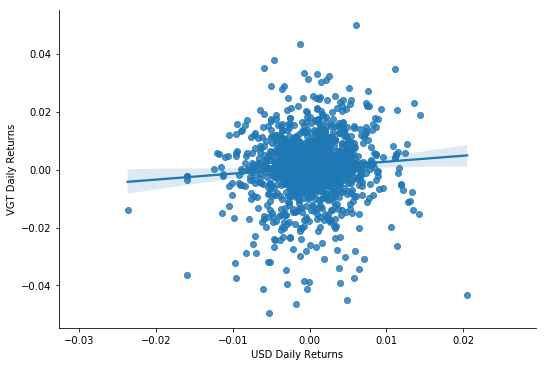

In [53]:
sns.lmplot(x='USD Daily Returns', y='VGT Daily Returns', data=combined_daily_return_five_USD, aspect=1.5, fit_reg=True)


In [55]:
# Calculates the 30-day rolling covariance of Bitcoin vs. USD and plot the data
rolling_covariance_vgt_usd = combined_daily_return_five_USD['VGT Daily Returns'].rolling(window=30).cov(combined_daily_return_five_USD['USD Daily Returns'])
rolling_covariance_vgt_usd.hvplot(figsize=(20, 10), title='Rolling 30-Day Covariance of VGT Returns vs. USD Returns')

:Curve   [Date]   (0)

In [57]:
# Calculate 30-day rolling covariance of Bitcoin vs. USD and plot the data
rolling_variance = combined_daily_return_five_USD['USD Daily Returns'].rolling(window=30).var()

# Calculate 30-day rolling beta of Bitcoin and plot the data
rolling_vgt_beta_usd = rolling_covariance_vgt / rolling_variance

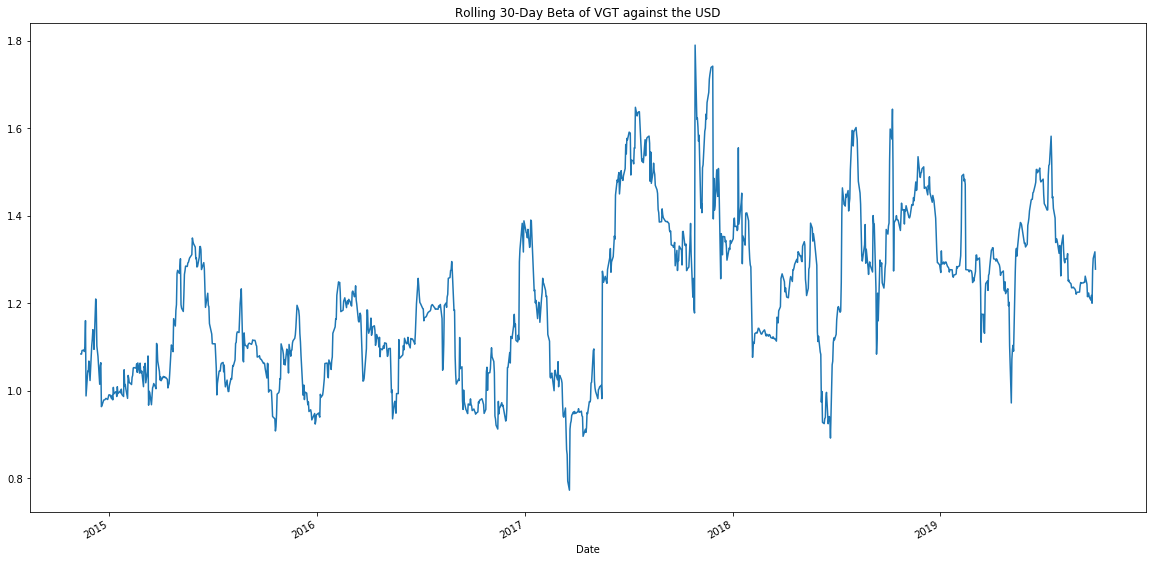

In [59]:
mc = rolling_vgt_beta.plot(figsize=(20, 10), title='Rolling 30-Day Beta of VGT against the USD')
mc.figure.savefig('rolling_vgt_beta_usd.png')

In [62]:
print(f"VGT's beta to the S&P500 is {vgt_beta_round}, indicating it does follow the S&P 500 and has a high level of correlation")
print(f"VGT beta to the USD is {vgt_beta_USD_round}, indicating it also follows the USD and has a slightly positive correlation")

VGT's beta to the S&P500 is 1.19, indicating it does follow the S&P 500 and has a high level of correlation


NameError: name 'vgt_beta_USD_round' is not defined